<a href="https://colab.research.google.com/github/Khuzamaalk/T5_BootCamp/blob/main/Clustering_Task_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

## Load the Data

In [70]:
df = pd.read_csv('/content/Traffic_Accidents.csv')
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [71]:
df.shape

(52000, 26)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [73]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,float64
Number_of_Vehicles,int64
Number_of_Casualties,float64
Date,object
Day_of_Week,int64


In [74]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [75]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [77]:
df.duplicated().sum()

43

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

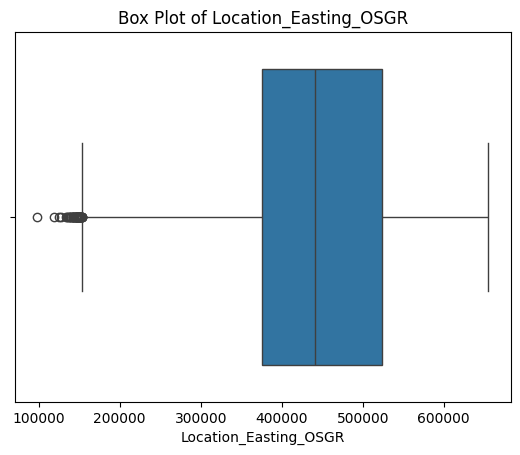

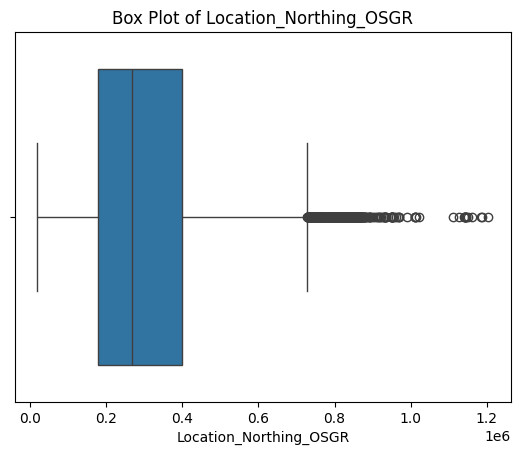

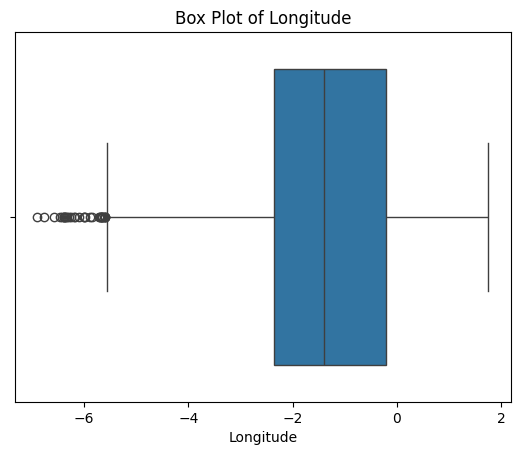

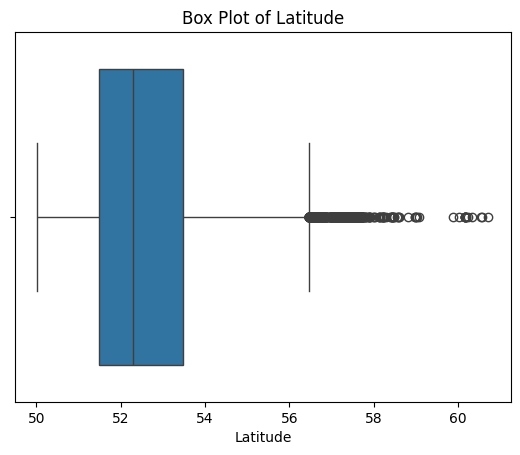

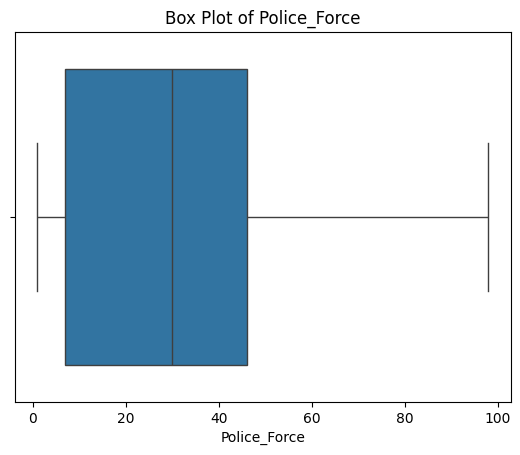

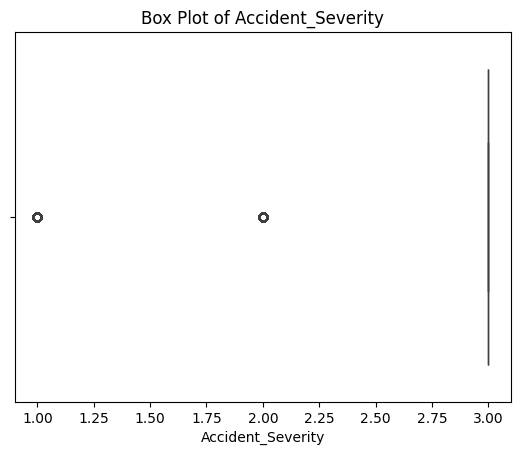

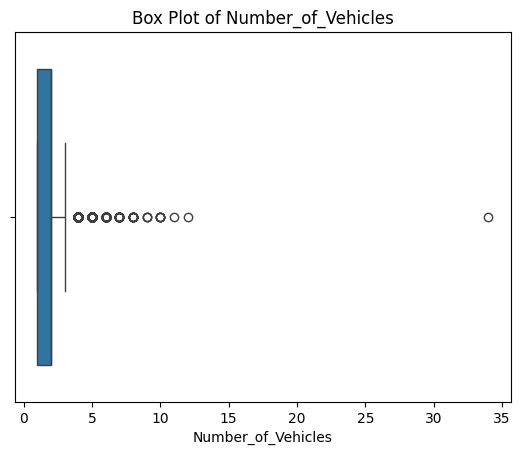

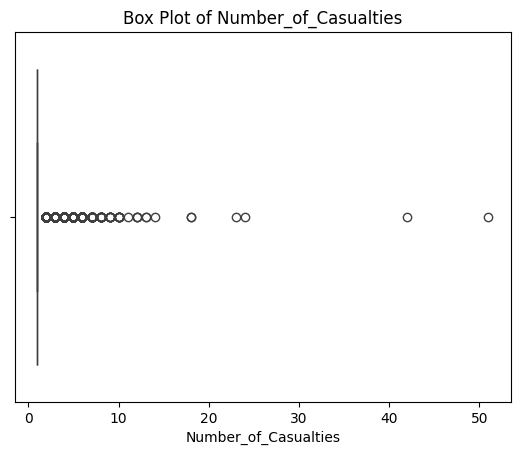

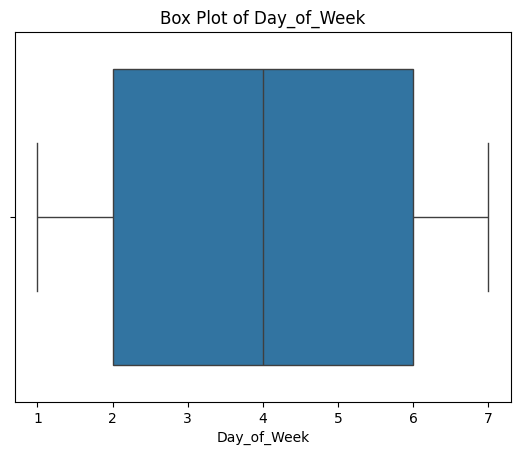

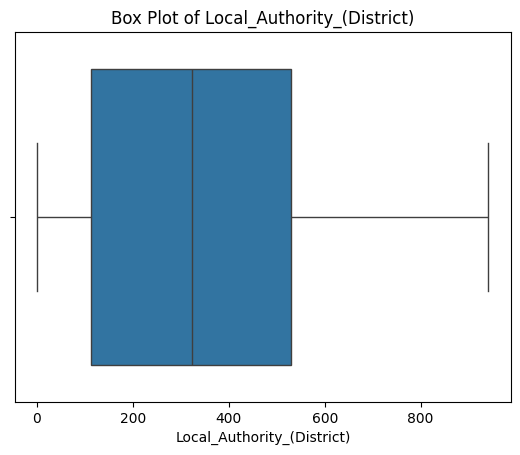

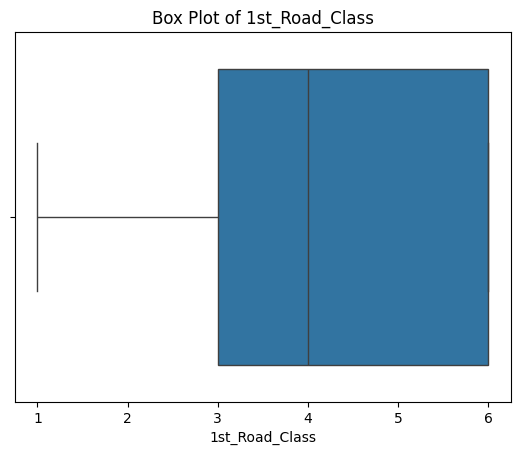

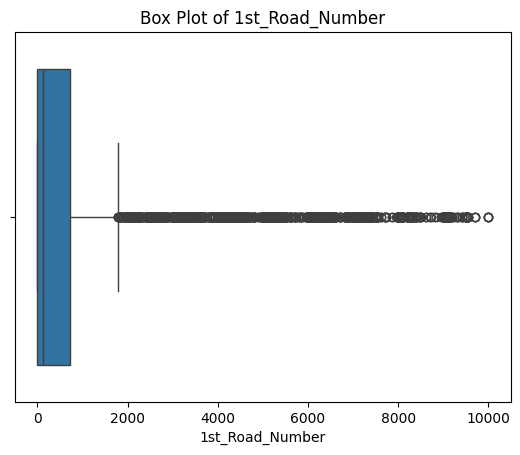

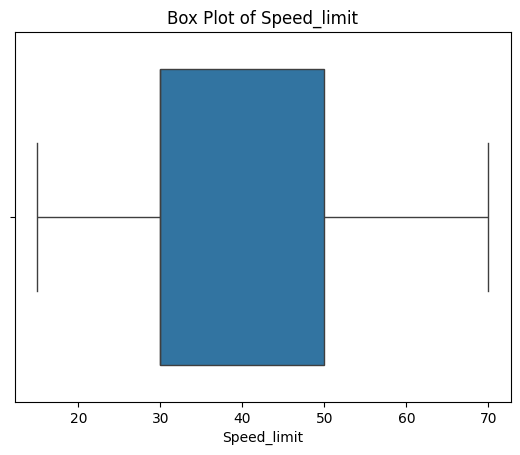

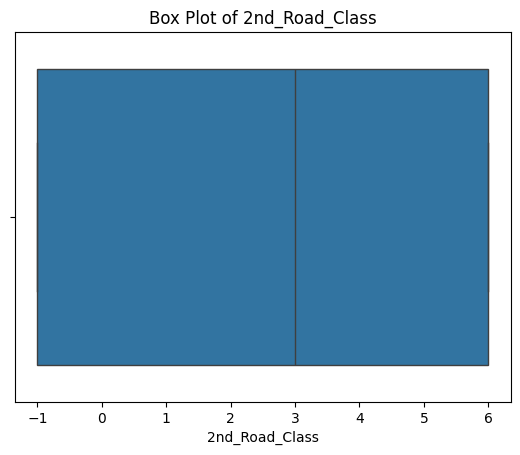

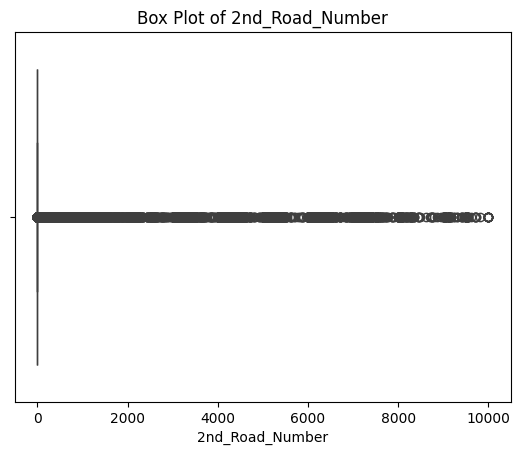

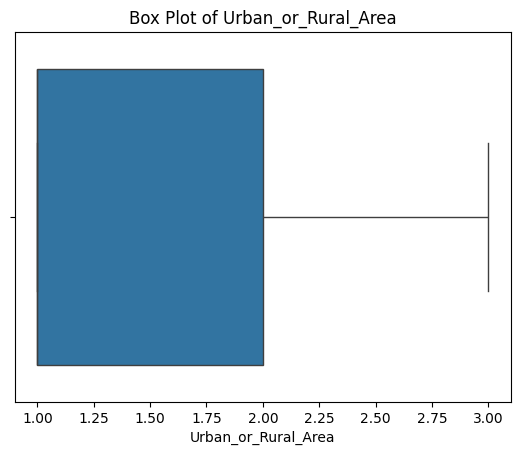

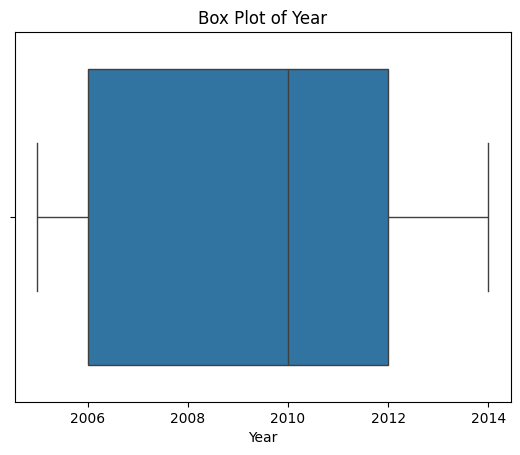

In [78]:
# I want to see the outliers clearly, so I will use the box plot

numerical_cols = df.select_dtypes(include=['float', 'int']).columns
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [79]:
# Removing the outliers by using the IQR method

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [80]:
df.shape

# Dataset shape before removing the outliers: (52000, 26)
# Dataset shape after removing the outliers: (13665, 26)

(13665, 26)

In [81]:
columns_to_drop = ['Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class',
                   '1st_Road_Number', 'Road_Type', '2nd_Road_Class', '2nd_Road_Number',
                   'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Date',
                   'Did_Police_Officer_Attend_Scene_of_Accident']
df = df.drop(columns=columns_to_drop)
df.head()


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,1,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,2010
10,508230.0,429880.0,-0.359973,53.754047,16,3.0,1,1.0,5,30,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,2006
13,423560.0,424220.0,-1.644505,53.713866,13,3.0,2,1.0,5,30,Daylight: Street light present,Fine without high winds,Dry,1.0,2010
19,456650.0,302420.0,-1.164706,52.616576,33,3.0,2,1.0,6,30,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,2005
21,532130.0,196100.0,-0.091611,51.648127,1,3.0,2,1.0,1,30,Daylight: Street light present,Fine without high winds,Dry,1.0,2005


In [82]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Day_of_Week,0
Speed_limit,0


In [83]:
df['Light_Conditions'].sample(20)

,Light_Conditions
15741,Daylight: Street light present
30620,Daylight: Street light present
50940,Daylight: Street light present
22215,Daylight: Street light present
14930,Darkness: Street lights present and lit
44910,Daylight: Street light present
11554,Daylight: Street light present
3111,Daylight: Street light present
11541,Darkness: Street lights present and lit
34746,Daylight: Street light present


In [84]:
df['Light_Conditions'] = df['Light_Conditions'].fillna('Unknown')

In [85]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Day_of_Week,0
Speed_limit,0


In [86]:
df.shape

# Dataset shape before removing unnecessary columns : (13665, 26) #Hint: this is the shape after removing the outliers
# Dataset shape after removing unnecessary columns: (13665, 17)

(13665, 15)

In [87]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,float64
Number_of_Vehicles,int64
Number_of_Casualties,float64
Day_of_Week,int64
Speed_limit,int64


In [88]:
df['Accident_Severity'].sample(40)

,Accident_Severity
31861,3.0
14045,3.0
21711,3.0
44303,3.0
31891,3.0
6674,3.0
882,3.0
44930,3.0
51269,3.0
5235,3.0


In [89]:
df['Number_of_Casualties'].sample(20)

,Number_of_Casualties
27657,1.0
16899,1.0
21290,1.0
34842,1.0
9462,1.0
2051,1.0
14821,1.0
12496,1.0
30706,1.0
37946,1.0


In [90]:
df['Urban_or_Rural_Area'].sample(20)

,Urban_or_Rural_Area
44150,1.0
25879,1.0
50688,1.0
12418,1.0
51275,1.0
7812,1.0
50119,1.0
20760,1.0
34865,1.0
15248,1.0


In [91]:
df['Accident_Severity'] = df['Accident_Severity'].astype(int)
df['Number_of_Casualties'] = df['Number_of_Casualties'].astype(int)
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype(int)

In [92]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,int64
Number_of_Casualties,int64
Day_of_Week,int64
Speed_limit,int64


In [93]:
df.shape

(13665, 15)

In [96]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,int64
Number_of_Casualties,int64
Day_of_Week,int64
Speed_limit,int64


In [98]:
# Now we will apply the One-Hot Encoder for the

df = pd.get_dummies(df, columns=['Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions'])

In [100]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [105]:
pca = PCA(n_components=0.9)

x_pca = pca.fit_transform(scaled_data)
df = pd.DataFrame(x_pca)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.347127,1.091643,2.376123,-0.488235,-0.028212,-0.161573,0.575951,0.023016,0.355847,0.133369,...,0.187072,-0.478524,0.161749,0.302905,-0.350146,-1.228218,-0.192878,0.323438,0.522814,-0.089766
1,2.599724,2.241594,-2.118047,-0.221903,-0.659882,-0.754583,-0.015460,-1.232246,-0.171509,-0.709018,...,-0.125271,-0.497714,0.651887,-0.532141,-0.044872,0.674510,1.801846,-0.317942,-0.113331,0.265875
2,-0.246266,-1.536379,-0.388578,0.130699,-0.180647,-0.149758,0.444650,-0.461804,0.037790,-0.152627,...,0.037324,0.100836,-0.432585,-0.013796,0.402740,0.459184,0.052554,-0.113391,0.593901,0.021891
3,0.827308,0.530030,-1.117795,-0.146087,-0.780601,0.052898,0.297506,0.214330,-0.406073,-0.218365,...,-0.034897,0.553532,0.776210,0.197799,-0.174861,0.834998,0.331592,-0.310699,0.642788,0.690761
4,-2.033576,0.267025,-0.545953,0.203620,-0.217343,0.202851,0.535795,0.545139,0.038482,-0.086438,...,0.189231,-0.451380,0.870547,-0.055875,-0.789265,-0.875054,1.002038,-0.152124,0.933981,0.199184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13660,0.904942,-1.170974,2.761757,-0.601138,-0.101541,-0.480577,-0.082253,-0.654184,-0.031776,-0.921126,...,-0.218445,-0.238154,0.663154,-0.075272,-0.122855,0.237532,0.617894,-0.100056,-0.060183,-0.110220
13661,0.434619,-0.699250,2.576672,-0.556358,-0.179936,-0.370415,0.569381,-0.186606,-0.655735,-0.765281,...,-0.195705,0.504027,0.575853,0.332874,0.190982,1.195938,0.053891,0.122800,0.970416,0.154895
13662,3.453444,3.199918,0.499626,-1.015155,-1.107456,-0.282523,3.555712,2.951564,-2.359043,1.373927,...,-1.449761,0.674202,0.298204,0.909516,-0.181787,0.902397,-0.308131,-0.010360,-1.926516,-0.711493
13663,-0.827376,1.919070,-0.967925,0.642392,1.291092,4.552559,-0.154774,-0.342499,-0.442788,-1.300964,...,0.501059,-0.718015,0.788803,-0.247189,0.495070,2.515692,-0.243995,-0.090039,1.463962,-4.158269


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
# I select the features that may help me to understand the data and see how the clusters show
features = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
            'Latitude', 'Accident_Severity', 'Number_of_Vehicles',
            'Number_of_Casualties', 'Speed_limit']

X = df[features]

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [113]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)
plt.title('Scatter Plot of Accidents by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

ValueError: Could not interpret value `Longitude` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x800 with 0 Axes>

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

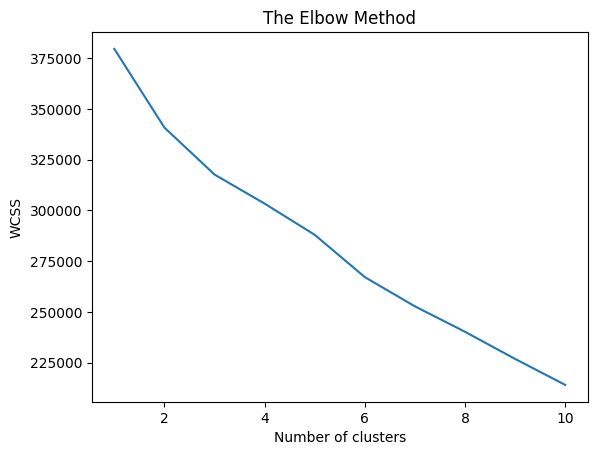

In [106]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
def calculate_elbow_and_draw_it(data):
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()
calculate_elbow_and_draw_it(df)

In [108]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [112]:
# Calculate silhouette score to evaluate the quality of clusters
sil_score = silhouette_score(df, clusters)

print("Silhouette Score", sil_score)

Silhouette Score: 0.12451564226408006


In [121]:
# Get the cluster centers then I can visualize the clusters later on
cluster_centers = kmeans.cluster_centers_
print('Cluster Centers:')
print(cluster_centers)

Cluster Centers:
[[ 2.49333160e+00  2.31746380e+00 -2.71207048e-01  1.02487954e-01
  -8.52259187e-02  4.91063115e-03  2.28492946e-02 -2.85917275e-02
   4.92455539e-02 -7.89348602e-04 -6.90719950e-02  5.05271431e-02
   7.97094593e-03  2.38369365e-02  1.99253267e-02  1.67210828e-02
  -1.00874350e-02 -1.20533758e-02  3.36126178e-03  3.09957619e-02
  -3.73776915e-02]
 [-1.70245734e+00  4.77797874e-01  3.85791071e-02 -9.79011685e-03
   3.74582308e-03  3.73245599e-02 -1.41314576e-02  5.41503003e-02
  -5.85119214e-03 -1.11527785e-02 -1.48934059e-02  8.31627699e-04
  -3.90351885e-03 -9.88336389e-04  6.82548451e-03  4.07384127e-03
   3.87343559e-03 -1.18166472e-02  1.53488625e-03 -5.28566017e-02
   2.60519464e-02]
 [ 4.89471662e-01 -1.52208915e+00  8.74449480e-02 -3.76405756e-02
   3.55187530e-02 -3.80720408e-02  3.07478623e-03 -3.88432883e-02
  -1.69855854e-02  1.10649816e-02  4.59921646e-02 -2.39868969e-02
   8.78259140e-05 -9.99122413e-03 -1.56945397e-02 -1.15833868e-02
   9.12380747e-04  1.

## Plot the data points with their predicted cluster center

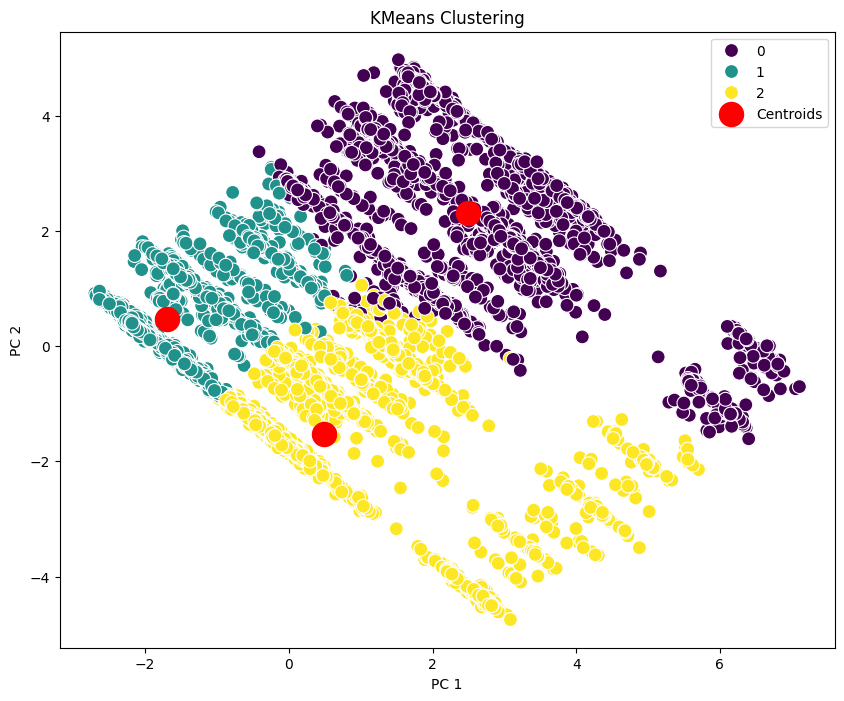

In [123]:
# Here I assumed that the data frame of the pc has only two components just to visualize the clustering

plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=df.iloc[:, 0],
    y=df.iloc[:, 1],
    hue=clusters,
    palette='viridis',
    marker='o',
    s=100,
    edgecolor='w'
)

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    s=300,
    c='red',
    marker='o', # I colored the centers with red and named it ( O ) to recognize it
    label='Centroids'
)

plt.title('KMeans Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?